#Instalacion librerias


In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm chembl_webresource_client git+https://github.com/ikmckenz/adme-pred-py.git

  Cloning https://github.com/ikmckenz/adme-pred-py.git to /tmp/pip-req-build-5g7d2kar
  Running command git clone --filter=blob:none --quiet https://github.com/ikmckenz/adme-pred-py.git /tmp/pip-req-build-5g7d2kar
  Resolved https://github.com/ikmckenz/adme-pred-py.git to commit 8091a02fe5998b8ba237760ade7ff3400abbbcdd
  Preparing metadata (setup.py) ... done


In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm useful_rdkit_utils seaborn scikit-posthocs chembl_downloader chembl_webresource_client  pubchempy

#Importacion

In [ ]:
import os

# Importar libreria para guardar trabajar con tablas
import pandas as pd
import numpy as np

# Importar las librerias de RDKit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

# Importar las funciones de 'scipy'
from scipy.cluster.hierarchy import dendrogram, linkage, is_valid_linkage, cut_tree

# Importar las funciones de 'sklearn'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

# Importar libreria de PubChem
import pubchempy as pcp

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

# Importar el módulo de advertencias
import warnings

# Importar el módulo sys
import sys
np.set_printoptions(threshold=sys.maxsize)


from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols


# Importar libreria de RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# Importar libreria para cambiar el directorio y guardar archivos
import os

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

import pandas as pd

from chembl_webresource_client.new_client import new_client

# Importar libreria de ADME
from adme_pred import ADME

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Active","Inactive"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

#Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Indicar la carpeta de trabajo
#path_luz = '/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos'
path_luz = "/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos/Activos_contra_Lys"
path_mer = '/content/drive/Shareddrives/Doctorado/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos/Activos_contra_Lys'
os.chdir(path_luz)

#Modelo

In [ ]:
total=pd.read_csv("Resultados_compuestos_lys_con_kmeans.csv")

In [ ]:
total


,Unnamed: 0,level_0,index,canonical_smiles,ROMol,InchiKey,Activity,Organismo,assay_chembl_id,type,Activity_metric
0,0,0,0,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8df5b3e0>,QQWUGDVOUVUTOY-UHFFFAOYSA-N,Active,Human,CHEMBL1006347,IC50,low
1,1,1,1,Cc1ccc(NC(=O)c2cccc(C(F)(F)F)c2)cc1N1Cc2cnc(N)...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8df5ba70>,ZWVLMQTXUWMUII-UHFFFAOYSA-N,Active,Human,CHEMBL974011,EC50,low
2,2,4,4,CN(C)c1ccc(-c2cc3ncccc3c(NCCCCN)n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fdb8df5b1b0>,SBGMPUIVPOGTGN-UHFFFAOYSA-N,Active,Human,CHEMBL1025770,IC50,high
3,3,5,5,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8df5b4c0>,HKSZLNNOFSGOKW-FYTWVXJKSA-N,Active,Human,CHEMBL981176,IC50,high
4,4,6,6,COc1cc(Nc2nc(N[C@H]3CCCC[C@H]3N)n3nc(-c4ccccc4...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8df5aab0>,VLHKHLQNVJKAHG-UXHICEINSA-N,Active,Human,CHEMBL981176,IC50,high
...,...,...,...,...,...,...,...,...,...,...,...
69114,69114,69832,68973,Cc1noc([C@@H]2C[C@@H]3CCN(c4nnc(C)s4)C[C@H]3O2...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8a59af80>,CLBBZXBSDYSJQO-PBDVDRNWSA-N,Inactive,Plasmodium,NaN,NaN,NaN
69115,69115,69833,68974,N#Cc1cccc(CN2C[C@@H]3CN(c4ncccn4)C[C@@H]3C2)c1...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8a59aff0>,QXUBWQVELITOIY-OKZTUQRJSA-N,Inactive,Plasmodium,NaN,NaN,NaN
69116,69116,69834,68975,Cc1ccc(N2CC[C@H](OCC3CC3)[C@@H]2Cc2cccnc2)nn1....,<rdkit.Chem.rdchem.Mol object at 0x7fdb8a59b060>,NZIAYXBYYLQTQI-APTPAJQOSA-N,Inactive,Plasmodium,NaN,NaN,NaN
69117,69117,69835,68976,O=C(O)C(F)(F)F.c1cnc(N2CCO[C@@H]3CN(Cc4ccoc4)C...,<rdkit.Chem.rdchem.Mol object at 0x7fdb8a59b0d0>,KQPDTOXIHCTWNQ-CTHHTMFSSA-N,Inactive,Plasmodium,NaN,NaN,NaN


In [ ]:
total["Activity_metric"]=total["Activity_metric"].fillna("I")

In [ ]:
train_df, test_df = train_test_split(total, test_size=0.2, random_state=42, stratify=total[["Activity_metric"]])

In [ ]:
train_df.Activity_metric.value_counts()

I       55234
high       42
low        19
Name: Activity_metric, dtype: int64

In [ ]:
test_df.Activity_metric.value_counts()

I       13809
high       10
low         5
Name: Activity_metric, dtype: int64

#GRID SEARCH AUTOMATCO

In [ ]:
# filtrar SMILES que no den error
SMILES = []
for i in range(len(total['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(total['canonical_smiles'].iloc[i])
    SMILES.append(cs)
  except:
    print('Invalid SMILES:',total['canonical_smiles'].iloc[i],i)

In [ ]:
indices_a_eliminar = [69119]
total = total.drop(indices_a_eliminar)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptors = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity= total["Activity"].tolist()

In [ ]:
import statistics

lista_descriptores = [numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge]
lista_descriptores_transformada = []
# Supongamos que tienes una lista llamada "mi_lista"

for i in range(len(lista_descriptores)):
  lista_un_descriptor = lista_descriptores[i]
  # Calcula la media y la desviación estándar de la lista
  media = statistics.mean(lista_un_descriptor)
  desviacion_estandar = statistics.stdev(lista_un_descriptor)

  # Aplica la transformación a cada valor en la lista
  if desviacion_estandar == 0:
    lista_un_descriptor_transformada = [(x - media) for x in lista_un_descriptor]
    lista_descriptores_transformada.append(lista_un_descriptor_transformada)
  else:
    lista_un_descriptor_transformada = [(x - media) / desviacion_estandar for x in lista_un_descriptor]
    lista_descriptores_transformada.append(lista_un_descriptor_transformada)

#print(lista_descriptores_transformada)

In [ ]:
descriptors_transformados = pd.DataFrame(lista_descriptores_transformada)
Activity= total['Activity']
descriptors_transformados = descriptors_transformados.transpose()

In [ ]:
 # Columna que indica los grupos de validación
#X = np.array(descriptors) #osea a partir de todas estas caracteritias de los compuestos predecir la y
X = np.array(descriptors_transformados)
y = np.array(Activity)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

##Sin cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# otro modelo, variando hiperparámetros

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(oob_score=True, random_state=42)

f1_scorer = make_scorer(f1_score, pos_label='Active')

rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300]},
                      cv=2,
                      scoring=f1_scorer)

# Ajusto
rfcv.fit(X_train1,y_train1)

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor f1", rfcv.best_score_)

mejor_modelo=rfcv.best_estimator_

Mejores hiperparámetros: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 50}
Mejor f1 0.5508333333333333


In [ ]:
y_pred_sincross= mejor_modelo.predict(X_test1)

SVM Metrics:
Accuracy: 0.9993489583333334
Recall: 0.1111111111111111
Precision: 0.5
F1-Score: 0.1818181818181818
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)


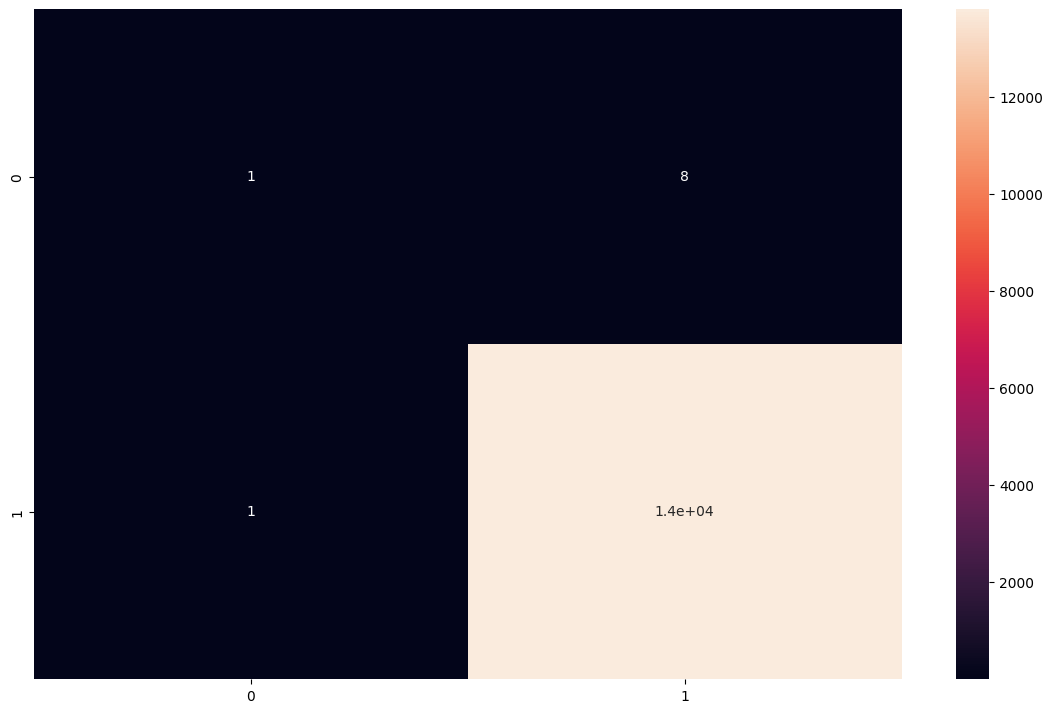

In [ ]:
# Calcular métricas para SVM
accuracy_svm = accuracy_score(y_test1,y_pred_sincross)
recall_svm = recall_score(y_test1, y_pred_sincross, pos_label="Active")
precision_svm = precision_score(y_test1, y_pred_sincross,pos_label="Active")
f1_svm = f1_score(y_test1, y_pred_sincross,pos_label="Active")
conf_matrix_svm = confusion_matrix(y_test1,y_pred_sincross)
#roc_auc_svm = roc_auc_score(y_test,y_svm_pred_sincross)


# Imprimir métricas para SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1-Score:", f1_svm)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_svm,annot=True))

In [ ]:
importance = mejor_modelo.feature_importances_

Feature: numb, Score: 0.05706
Feature: C, Score: 0.05602
Feature: O, Score: 0.05554
Feature: N, Score: 0.23215
Feature: Cl, Score: 0.01499
Feature: F, Score: 0.00018
Feature: Br, Score: 0.00000
Feature: I, Score: 0.00284
Feature: nh2_pattern, Score: 0.09586
Feature: ring5_counts , Score: 0.02156
Feature: ring6_counts, Score: 0.05041
Feature: MolWeight, Score: 0.07617
Feature: Rings, Score: 0.02918
Feature: TPSA, Score: 0.11004
Feature: FpDM1, Score: 0.06288
Feature: RotBonds, Score: 0.06188
Feature: formal_charge, Score: 0.07325
Feature: logp , Score: 0.00000


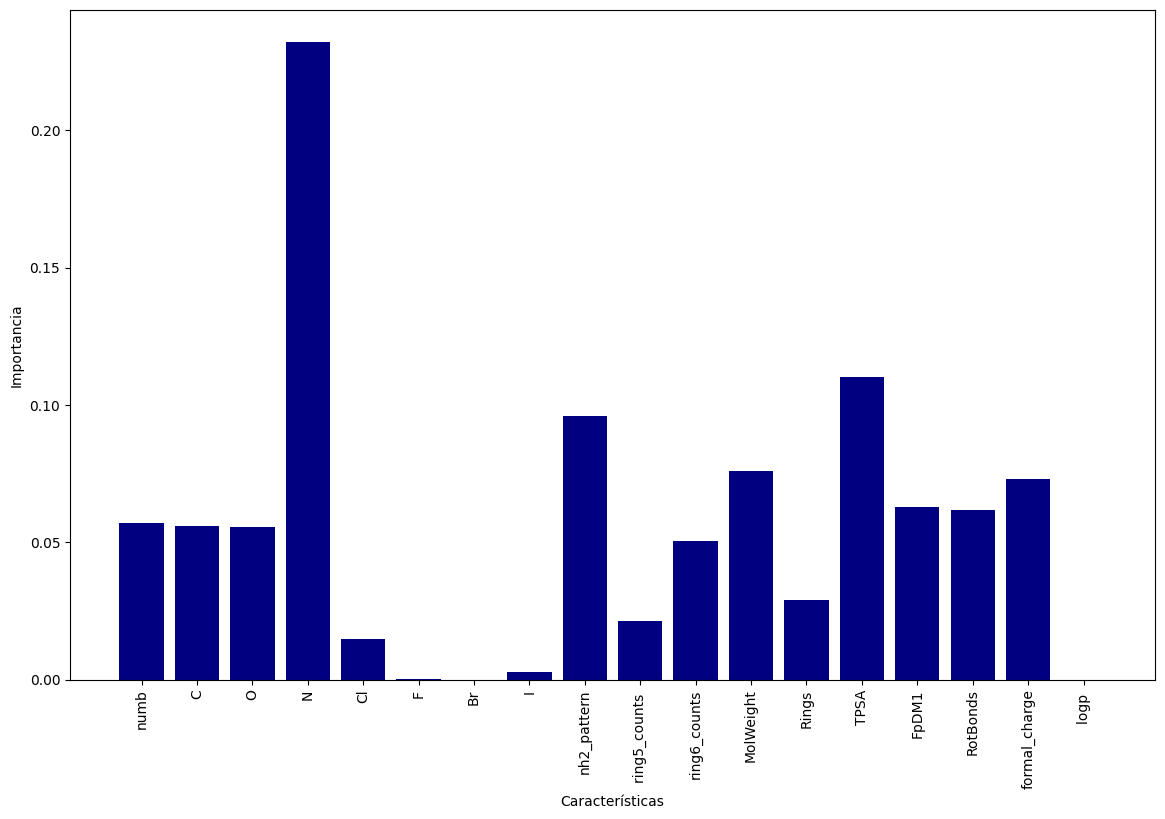

In [ ]:
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Supongamos que tienes una lista de nombres de características
nombres_caracteristicas = ["numb","C","O","N","Cl","F","Br","I","nh2_pattern","ring5_counts ","ring6_counts","MolWeight","Rings","TPSA","FpDM1","RotBonds","formal_charge","logp "]


importance = mejor_modelo.feature_importances_

# Sintetiza la importancia de las características
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (nombres_caracteristicas[i], v))

# Grafica de la importancia de las características
plt.bar([x for x in range(len(importance))], importance,color= "navy")
plt.xticks(range(len(importance)), nombres_caracteristicas, rotation=90)  # Agrega etiquetas al eje x
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()


##con cross validation al azar

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
# otro modelo, variando hiperparámetros

model = RandomForestClassifier(oob_score=True, random_state=42)

f1_scorer = make_scorer(f1_score, pos_label='Active')

rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300]},
                      cv=2,
                      scoring=f1_scorer)

# Ajusto
rfcv.fit(X_train1,y_train1)

# los mejores parámetros son

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor f1", rfcv.best_score_)

mejor_modelo=rfcv.best_estimator_

Mejores hiperparámetros: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 100}
Mejor f1 0.6113192071086808


In [ ]:
y_pred = mejor_modelo.predict(X_test1)

In [ ]:

accuracy = accuracy_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred, pos_label="Active")
precision = precision_score(y_test1, y_pred, pos_label="Active")
f1 = f1_score(y_test1, y_pred, pos_label="Active")
conf_matrix_xgb = confusion_matrix(y_test1, y_pred)
roc_auc_xgb = roc_auc_score(y_test1, y_pred)

# Imprimir métricas para XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_xgb,annot=True))
print("ROC AUC Score:", roc_auc_xgb)

ValueError: ignored

In [ ]:
importance = mejor_modelo.feature_importances_

In [ ]:
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Supongamos que tienes una lista de nombres de características
nombres_caracteristicas = ["numb","C","O","N","Cl","F","Br","I","nh2_pattern","ring5_counts ","ring6_counts","MolWeight","Rings","TPSA","FpDM1","RotBonds","formal_charge","logp "]


importance = mejor_modelo.feature_importances_

# Sintetiza la importancia de las características
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (nombres_caracteristicas[i], v))

# Grafica de la importancia de las características
plt.bar([x for x in range(len(importance))], importance,color= "navy")
plt.xticks(range(len(importance)), nombres_caracteristicas, rotation=90)  # Agrega etiquetas al eje x
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

##con cross validation por clster

In [ ]:
#FALTARIA VER LO DE KFOLD STRATIFIER O COM SE HACE
#Y SI CAMBIA DIVIDIR LOS GRUPOS CON STRATIFIER

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
grupos = descriptors["Cluster_PCA_5"]

X_train, X_test, y_train, y_test, grupos_train, grupos_test = train_test_split(X, y, grupos, test_size=0.2, random_state=42)

#GRID SEARCH MANUAL

In [ ]:
cluster0= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==0]
cluster1= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==1]
cluster2= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==2]
cluster3= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==3]
cluster4= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==4]

##Entrenamiento (1) 0,1,2,3 y testeo en 4

In [ ]:
entrenamiento1= pd.concat([cluster0,cluster1,cluster2,cluster3])
testeo1= cluster4

In [ ]:
entrenamiento1["Activity"].value_counts()

In [ ]:
# filtrar SMILES que no den error
SMILES1 = []
for i in range(len(entrenamiento1['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento1['canonical_smiles'].iloc[i])
    SMILES1.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento1['canonical_smiles'].iloc[i],i)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES1]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

Entrenamiento

In [ ]:
descriptors1 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity1= entrenamiento1['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X1 = np.array(descriptors1)
y1 = np.array(Activity1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# otro modelo, variando hiperparámetros

model = RandomForestClassifier(oob_score=True, random_state=42)

from sklearn.model_selection import GridSearchCV
rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300,500]},
                      cv=5,
                      scoring='accuracy')

# Ajusto
rfcv.fit(X1,y1)

# los mejores parámetros son

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor Accuracy", rfcv.best_score_)

mejor_modelo=rfcv.best_estimator_

Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt = []
for i in range(len(testeo1['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo1['canonical_smiles'].iloc[i])
    SMILESt.append(cs)

  except:
    print('Invalid SMILES:',testeo1['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt= testeo1['Activity'].tolist()

In [ ]:
Xt = np.array(descriptorst)
yt = np.array(Activityt)

pred_cluster4 = mejor_modelo.predict(Xt)

###Resultados 1

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt, pred_cluster4), 3)
precision = round(precision_score(yt,pred_cluster4, average='micro'), 3)
recall = round(recall_score(yt, pred_cluster4, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt,pred_cluster4)

In [ ]:
mostrar_resultados(yt, pred_cluster4)

##Entrenamiento(2) 0,1,2,4 y testeo en 3

In [ ]:
entrenamiento2= pd.concat([cluster0,cluster1,cluster2,cluster4])
testeo2= cluster3

In [ ]:
entrenamiento2["Activity"].value_counts()

In [ ]:
# filtrar SMILES que no den error
SMILES2= []
for i in range(len(entrenamiento2['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento2['canonical_smiles'].iloc[i])
    SMILES2.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento2['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES2]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors2 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity2= entrenamiento2['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X2= np.array(descriptors2)
y2 = np.array(Activity2)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = RandomForestClassifier(oob_score=True, random_state=42)

from sklearn.model_selection import GridSearchCV
rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300]},
                      cv=5,
                      scoring='accuracy')

# Ajusto
rfcv.fit(X2,y2)

# los mejores parámetros son

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor Accuracy", rfcv.best_score_)

mejor_modelo2=rfcv.best_estimator_

Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt2 = []
for i in range(len(testeo2['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo2['canonical_smiles'].iloc[i])
    SMILESt2.append(cs)

  except:
    print('Invalid SMILES:',testeo2['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt2]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst2 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt2= testeo2['Activity'].tolist()

In [ ]:
Xt2 = np.array(descriptorst2)
yt2 = np.array(Activityt2)

pred_cluster3= mejor_modelo2.predict(Xt2)

###Restultados 2

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt2, pred_cluster3), 3)
precision = round(precision_score(yt2,pred_cluster3, average='micro'), 3)
recall = round(recall_score(yt2, pred_cluster3, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt2,pred_cluster3)

In [ ]:
mostrar_resultados(yt2, pred_cluster3)

##Entrenamiento(3) 0,1,3,4 y testeo en 2

In [ ]:
entrenamiento3= pd.concat([cluster0,cluster1,cluster4,cluster3])
testeo3= cluster2

In [ ]:
entrenamiento3["Activity"].value_counts()

In [ ]:
# filtrar SMILES que no den error
SMILES3= []
for i in range(len(entrenamiento3['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento3['canonical_smiles'].iloc[i])
    SMILES3.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento3['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES3]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors3 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity3= entrenamiento3['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X3= np.array(descriptors3)
y3 = np.array(Activity3)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = RandomForestClassifier(oob_score=True, random_state=42)

from sklearn.model_selection import GridSearchCV
rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300]},
                      cv=5,
                      scoring='accuracy')

# Ajusto
rfcv.fit(X3,y3)

# los mejores parámetros son

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor Accuracy", rfcv.best_score_)

mejor_modelo3=rfcv.best_estimator_

Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt3 = []
for i in range(len(testeo3['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo3['canonical_smiles'].iloc[i])
    SMILESt3.append(cs)

  except:
    print('Invalid SMILES:',testeo3['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt3]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst3 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt3= testeo3['Activity'].tolist()

In [ ]:
Xt3 = np.array(descriptorst3)
yt3 = np.array(Activityt3)

pred_cluster2= mejor_modelo3.predict(Xt3)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt3,pred_cluster2), 3)
precision = round(precision_score(yt3,pred_cluster2, average='micro'), 3)
recall = round(recall_score(yt3, pred_cluster2, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt3,pred_cluster2)

### Restultados 3

In [ ]:
mostrar_resultados(yt3, pred_cluster2)

##Entrenamiento (4) 0,2,3,4 y testeo en 1

In [ ]:
entrenamiento4= pd.concat([cluster0,cluster4,cluster2,cluster3])
testeo4= cluster1

In [ ]:
entrenamiento4["Activity"].value_counts()

In [ ]:
# filtrar SMILES que no den error
SMILES4= []
for i in range(len(entrenamiento4['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento4['canonical_smiles'].iloc[i])
    SMILES4.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento4['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES4]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors4 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity4= entrenamiento4['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X4= np.array(descriptors4)
y4 = np.array(Activity4)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = RandomForestClassifier(oob_score=True, random_state=42)

from sklearn.model_selection import GridSearchCV
rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300]},
                      cv=5,
                      scoring='accuracy')

# Ajusto
rfcv.fit(X4,y4)

# los mejores parámetros son

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor Accuracy", rfcv.best_score_)

mejor_modelo4=rfcv.best_estimator_

Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt4 = []
for i in range(len(testeo4['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo4['canonical_smiles'].iloc[i])
    SMILESt4.append(cs)

  except:
    print('Invalid SMILES:',testeo4['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt4]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst4= pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt4= testeo4['Activity'].tolist()

In [ ]:
Xt4 = np.array(descriptorst4)
yt4 = np.array(Activityt4)

pred_cluster1= mejor_modelo3.predict(Xt4)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt4,pred_cluster1), 3)
precision = round(precision_score(yt4,pred_cluster1, average='micro'), 3)
recall = round(recall_score(yt4, pred_cluster1, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt4,pred_cluster1)

###Resutados 4

In [ ]:
mostrar_resultados(yt4, pred_cluster1)

##Entrenamiento (5) 1,2,3,4 y testeo en 0


In [ ]:
entrenamiento5= pd.concat([cluster4,cluster1,cluster2,cluster3])
testeo5= cluster0

In [ ]:
entrenamiento5["Activity"].value_counts()

In [ ]:
# filtrar SMILES que no den error
SMILES5= []
for i in range(len(entrenamiento5['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento5['canonical_smiles'].iloc[i])
    SMILES5.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento5['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES5]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors5 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity5= entrenamiento5['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X5= np.array(descriptors5)
y5 = np.array(Activity5)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = RandomForestClassifier(oob_score=True, random_state=42)

from sklearn.model_selection import GridSearchCV
rfcv = GridSearchCV(estimator=model,
                      param_grid={'max_depth': [2, 3, 4, 5, 6, 7,8,9], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [ 50,100,150,200,300]},
                      cv=5,
                      scoring='accuracy')

# Ajusto
rfcv.fit(X5,y5)

# los mejores parámetros son

print("Mejores hiperparámetros:", rfcv.best_params_)
print("Mejor Accuracy", rfcv.best_score_)

mejor_modelo5=rfcv.best_estimator_

Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt5 = []
for i in range(len(testeo5['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo5['canonical_smiles'].iloc[i])
    SMILESt5.append(cs)

  except:
    print('Invalid SMILES:',testeo5['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt5]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst5= pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt5= testeo5['Activity'].tolist()

In [ ]:
Xt5 = np.array(descriptorst5)
yt5 = np.array(Activityt5)

pred_cluster0= mejor_modelo3.predict(Xt5)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt5,pred_cluster0), 3)
precision = round(precision_score(yt5,pred_cluster0, average='micro'), 3)
recall = round(recall_score(yt5, pred_cluster0, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt5,pred_cluster0)

### Resultados 5

In [ ]:
mostrar_resultados(yt5, pred_cluster0)

##Prueba en testeo

In [ ]:
#use el modelo 3 para probar creoque es el que mejor predijo ambos

In [ ]:
total_prueba

In [ ]:
# filtrar SMILES que no den error
SMILESs= []
for i in range(len(total_prueba['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(total_prueba['canonical_smiles'].iloc[i])
    SMILESs.append(cs)

  except:
    print('Invalid SMILES:',total_prueba['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESs]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptorss = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activitys= total_prueba['Activity'].tolist()

In [ ]:
Xts = np.array(descriptorss)
yts = np.array(Activitys)

pred_prueba= mejor_modelo3.predict(Xts)

In [ ]:
total_prueba['Activity'].value_counts()

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yts,pred_prueba), 3)
precision = round(precision_score(yts,pred_prueba, average='micro'), 3)
recall = round(recall_score(yts, pred_prueba, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yts,pred_prueba)

In [ ]:
mostrar_resultados(yts,pred_prueba)